In [33]:
import numpy as np
import pandas as pd
import wordcloud
import os
print(os.listdir("C:/Users/sowmya ammu/Desktop/dataset"))

data=pd.read_csv("C:/Users/sowmya ammu/Desktop/dataset/spam.csv",encoding="latin-1")
data.shape
data.head()

['rdrfyf', 'Spam-detection-main', 'Spam-detection-main.zip', 'spam.csv', 'Untitled Folder']


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [34]:
#dropped the unused columns

data=data.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1)

In [35]:
#rename the cloumns

data=data.rename(columns={'v1':'Type','v2':'Messages'})
data.columns

Index(['Type', 'Messages'], dtype='object')

In [36]:
#filter the spam messages in the data set

df=pd.DataFrame(data)
spamfilter=df.loc[df['Type']=='spam']
print(spamfilter)

      Type                                           Messages
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
5     spam  FreeMsg Hey there darling it's been 3 week's n...
8     spam  WINNER!! As a valued network customer you have...
9     spam  Had your mobile 11 months or more? U R entitle...
11    spam  SIX chances to win CASH! From 100 to 20,000 po...
...    ...                                                ...
5537  spam  Want explicit SEX in 30 secs? Ring 02073162414...
5540  spam  ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547  spam  Had your contract mobile 11 Mnths? Latest Moto...
5566  spam  REMINDER FROM O2: To get 2.50 pounds free call...
5567  spam  This is the 2nd time we have tried 2 contact u...

[747 rows x 2 columns]


In [37]:
df=pd.DataFrame(data)
hamfilter=df.loc[df['Type']=='ham']
print(hamfilter)

     Type                                           Messages
0     ham  Go until jurong point, crazy.. Available only ...
1     ham                      Ok lar... Joking wif u oni...
3     ham  U dun say so early hor... U c already then say...
4     ham  Nah I don't think he goes to usf, he lives aro...
6     ham  Even my brother is not like to speak with me. ...
...   ...                                                ...
5565  ham                                       Huh y lei...
5568  ham              Will Ì_ b going to esplanade fr home?
5569  ham  Pity, * was in mood for that. So...any other s...
5570  ham  The guy did some bitching but I acted like i'd...
5571  ham                         Rofl. Its true to its name

[4825 rows x 2 columns]


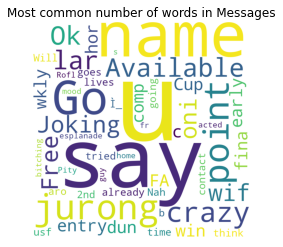

In [38]:
#print the most common number of words used in messages

from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud=WordCloud(background_color='white',width=1000,height=1000,max_words=50).generate(str(data['Messages']))
plt.rcParams["figure.figsize"]==(10,10)
plt.title("Most common number of words in Messages")
plt.axis('off')
plt.imshow(wordcloud)

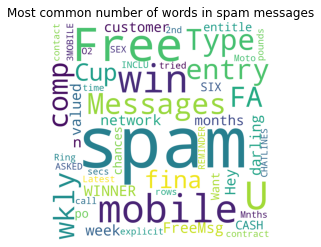

In [39]:
#print the most used words in spam messages 

wordcloud=WordCloud(background_color='white',width=1000,height=1000,max_words=50).generate(str([spamfilter]))
plt.rcParams["figure.figsize"]==(10,10)
plt.title("Most common number of words in spam messages")
plt.axis('off')
plt.imshow(wordcloud)


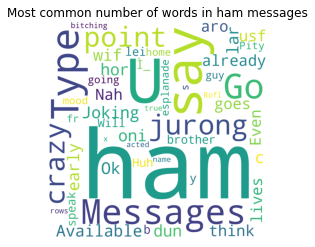

In [40]:
wordcloud=WordCloud(background_color='white',width=1000,height=1000,max_words=50).generate(str([hamfilter]))
plt.rcParams["figure.figsize"]==(10,10)
plt.title("Most common number of words in ham messages")
plt.axis('off')
plt.imshow(wordcloud)

In [41]:
#for removing the stop words(the process of coverting data to  something computer can understand is refer to as  preprocessing.
#in natural languages of processing usless words are refers to as stopwords.)
import re
import nltk

nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus=[]

[nltk_data] Downloading package stopwords to C:\Users\sowmya
[nltk_data]     ammu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [42]:
for i in range(0,5572):
    review=re.sub('[^a-zA-Z]','',data['Messages'][i])
    review=review.lower()
    review=review.split()
    ps=PorterStemmer()
    
    #stemming
    
    review=[ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    
    #joining them back with space 
    
    review=''.join(review)
    corpus.append(review)

In [43]:
#Counting the words
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

cv=CountVectorizer()
x=cv.fit_transform(corpus).toarray()
y=data.iloc[:,0]

print(x.shape)
print(y.shape)

(5572, 5079)
(5572,)


In [44]:
#split the dataset

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(4179, 5079)
(1393, 5079)
(4179,)
(1393,)


In [45]:
#standardization

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

Training Accuracy: 0.9995214166068438
Testing Accuracy: 0.9066762383345298
Confusion matrix:
Predicted  ham  spam  __all__
Actual                       
ham        301    10      311
spam        55     4       59
__all__    356    14      370


c:\python\lib\site-packages\pandas_confusion\__init__.py:135: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  idx_classes = (df.columns | df.index).copy()


<AxesSubplot:title={'center':'Confusion matrix'}, xlabel='Predicted', ylabel='Actual'>

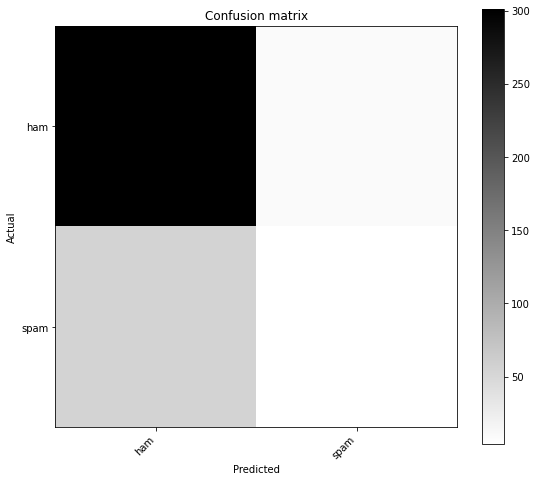

In [46]:
#implementation of random forest and confusion matrix

from sklearn.ensemble import RandomForestClassifier
from pandas_confusion import ConfusionMatrix
import matplotlib.pyplot as plt

model=RandomForestClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

print("Training Accuracy:",model.score(x_train,y_train))
print("Testing Accuracy:",model.score(x_test,y_test))


Confusionmatrix=ConfusionMatrix(y_test,y_pred)
print("Confusion matrix:\n%s"%Confusionmatrix)

Confusionmatrix.plot()

In [47]:
import pickle

In [48]:
ml=open("spam_model.pkl","wb")